In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C://Users//Dell//Desktop//laptop_data.csv')
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [3]:
df.shape

(1273, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


<AxesSubplot:>

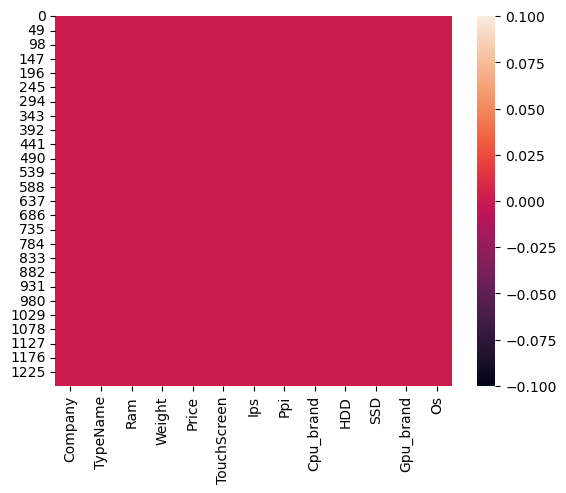

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [7]:
#There are no null values prsent in data.

In [8]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [9]:
#theres is large difference between 75 % quartile to max values so possibility of outliers present in the data which need to be treated.

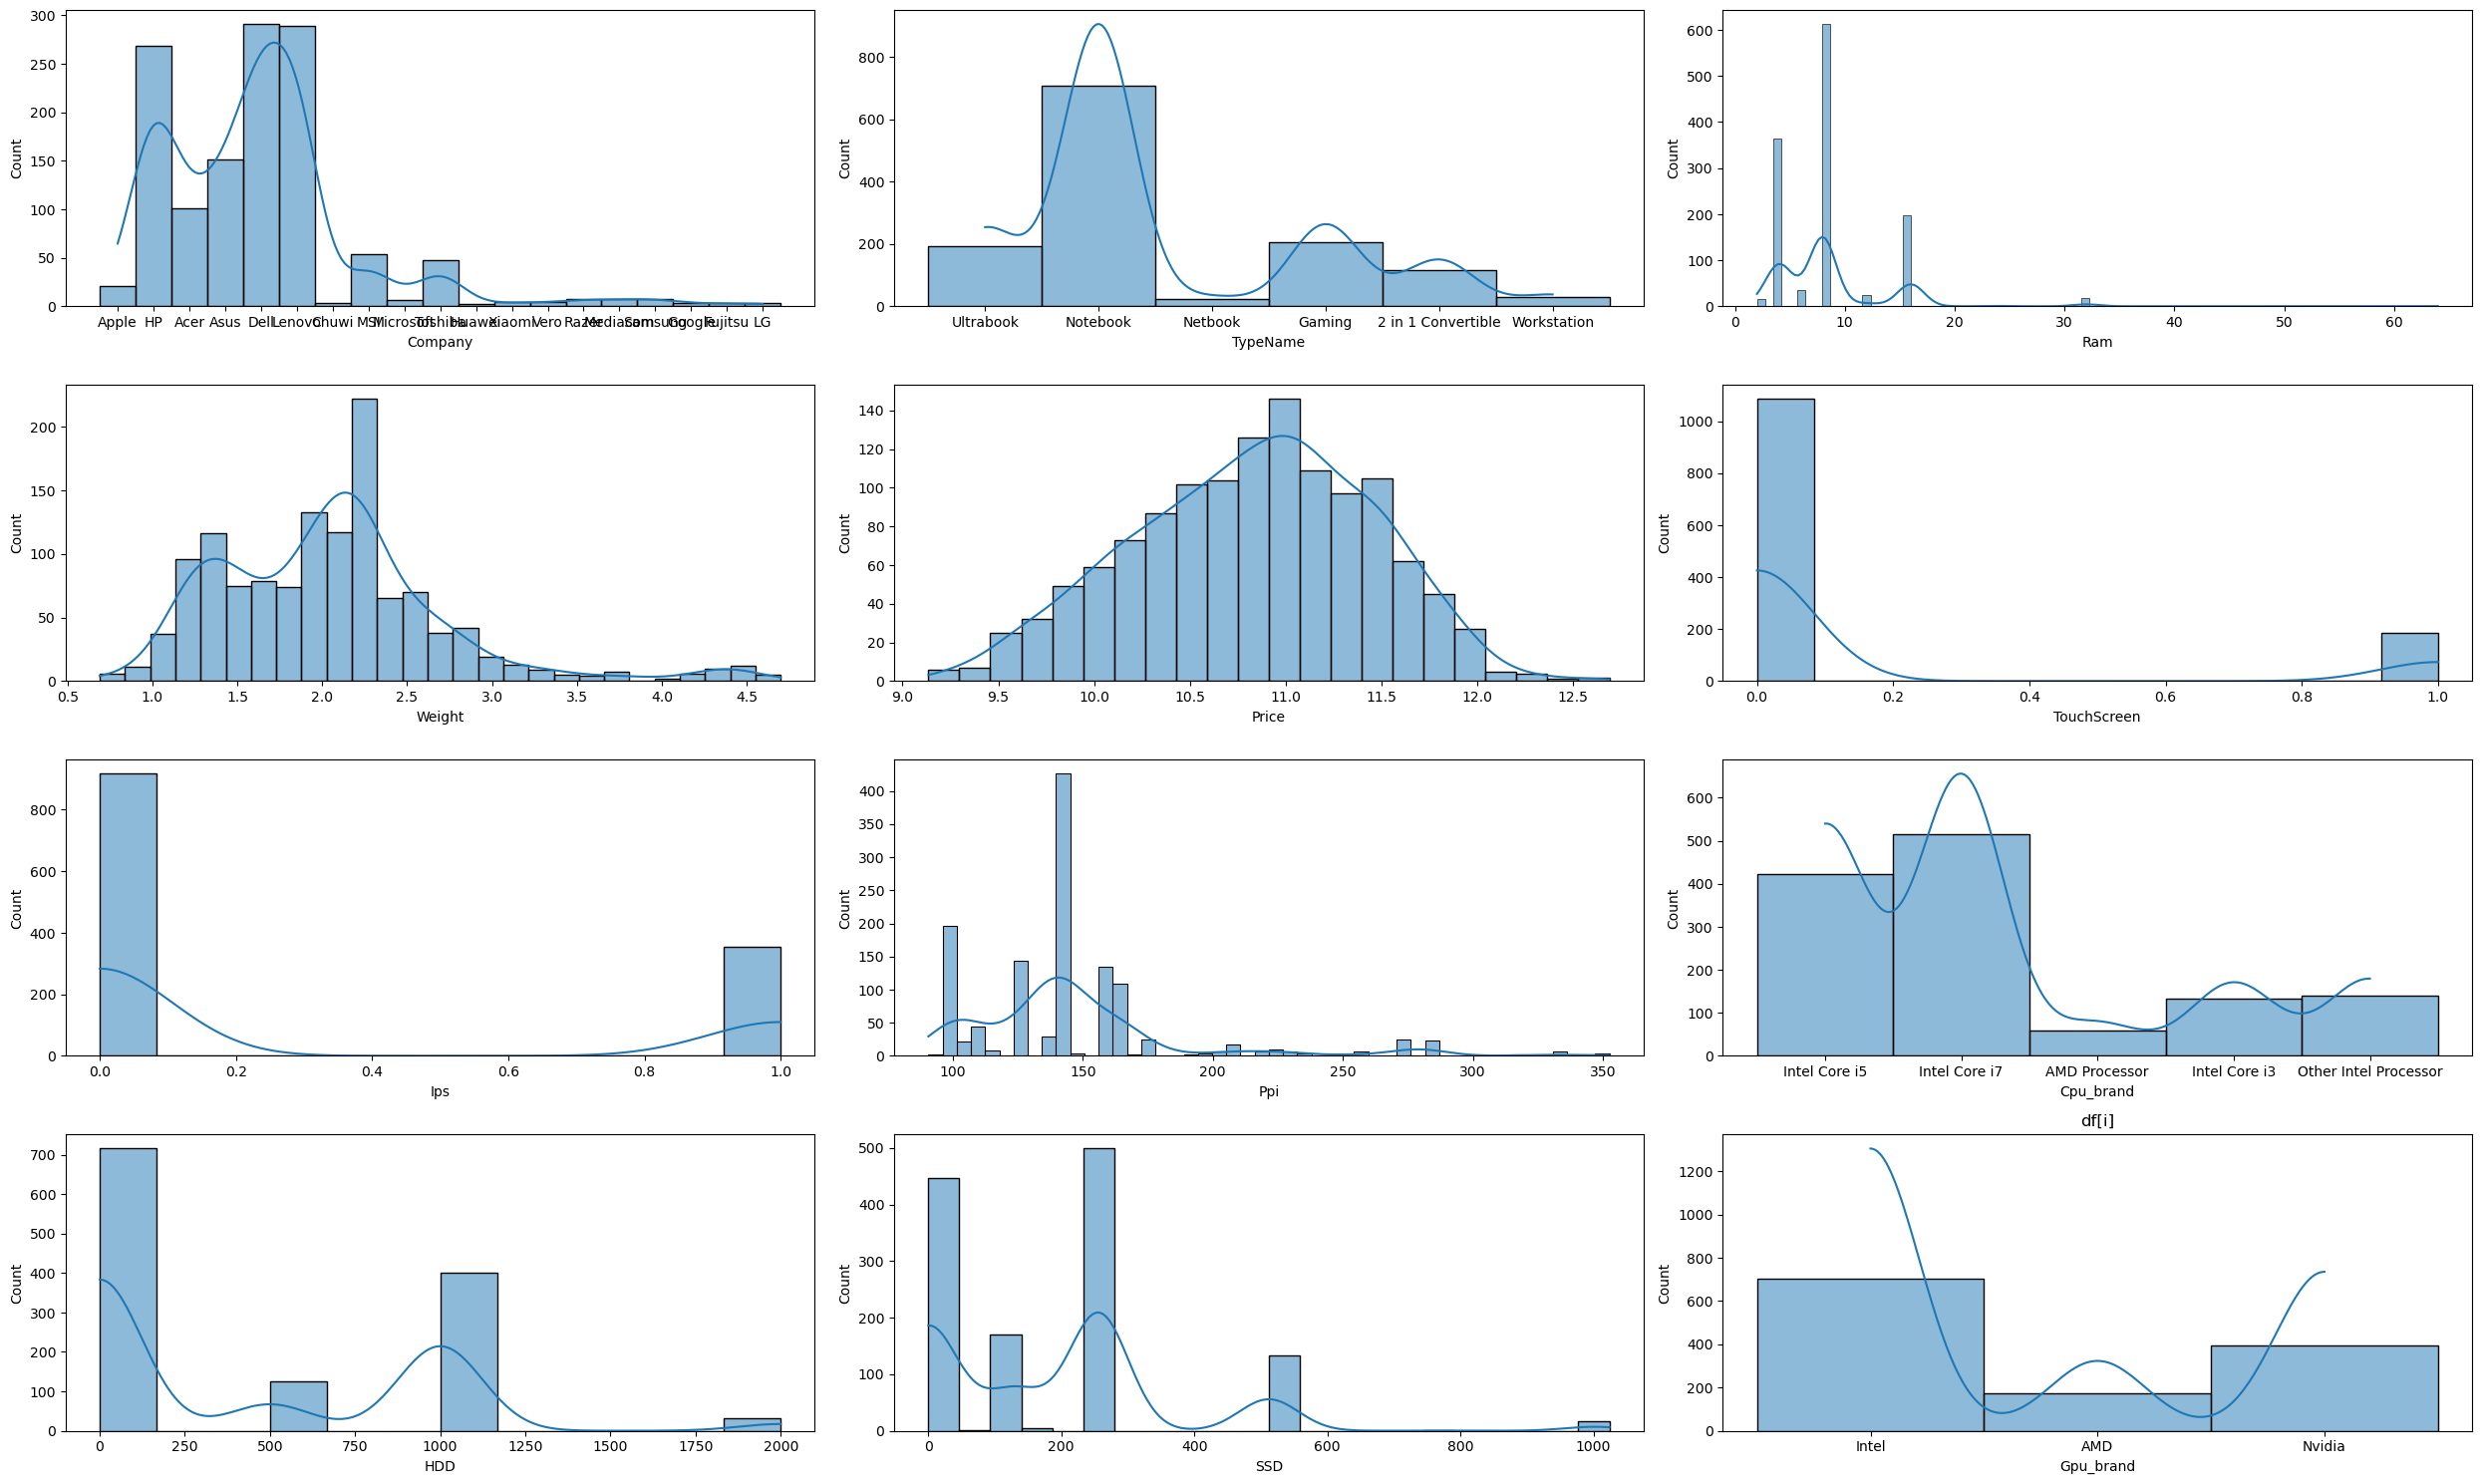

In [10]:
fig, ax= plt.subplots(4,3, figsize=(25,15))
for i, subplot in zip(df, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

In [11]:
num=df.select_dtypes(include=np.number)
num

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256
...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,500,0
1269,4,1.80,10.433899,1,1,157.350512,0,128
1270,16,1.30,11.288115,1,1,276.053530,0,512
1271,2,1.50,9.409283,0,0,111.935204,0,0


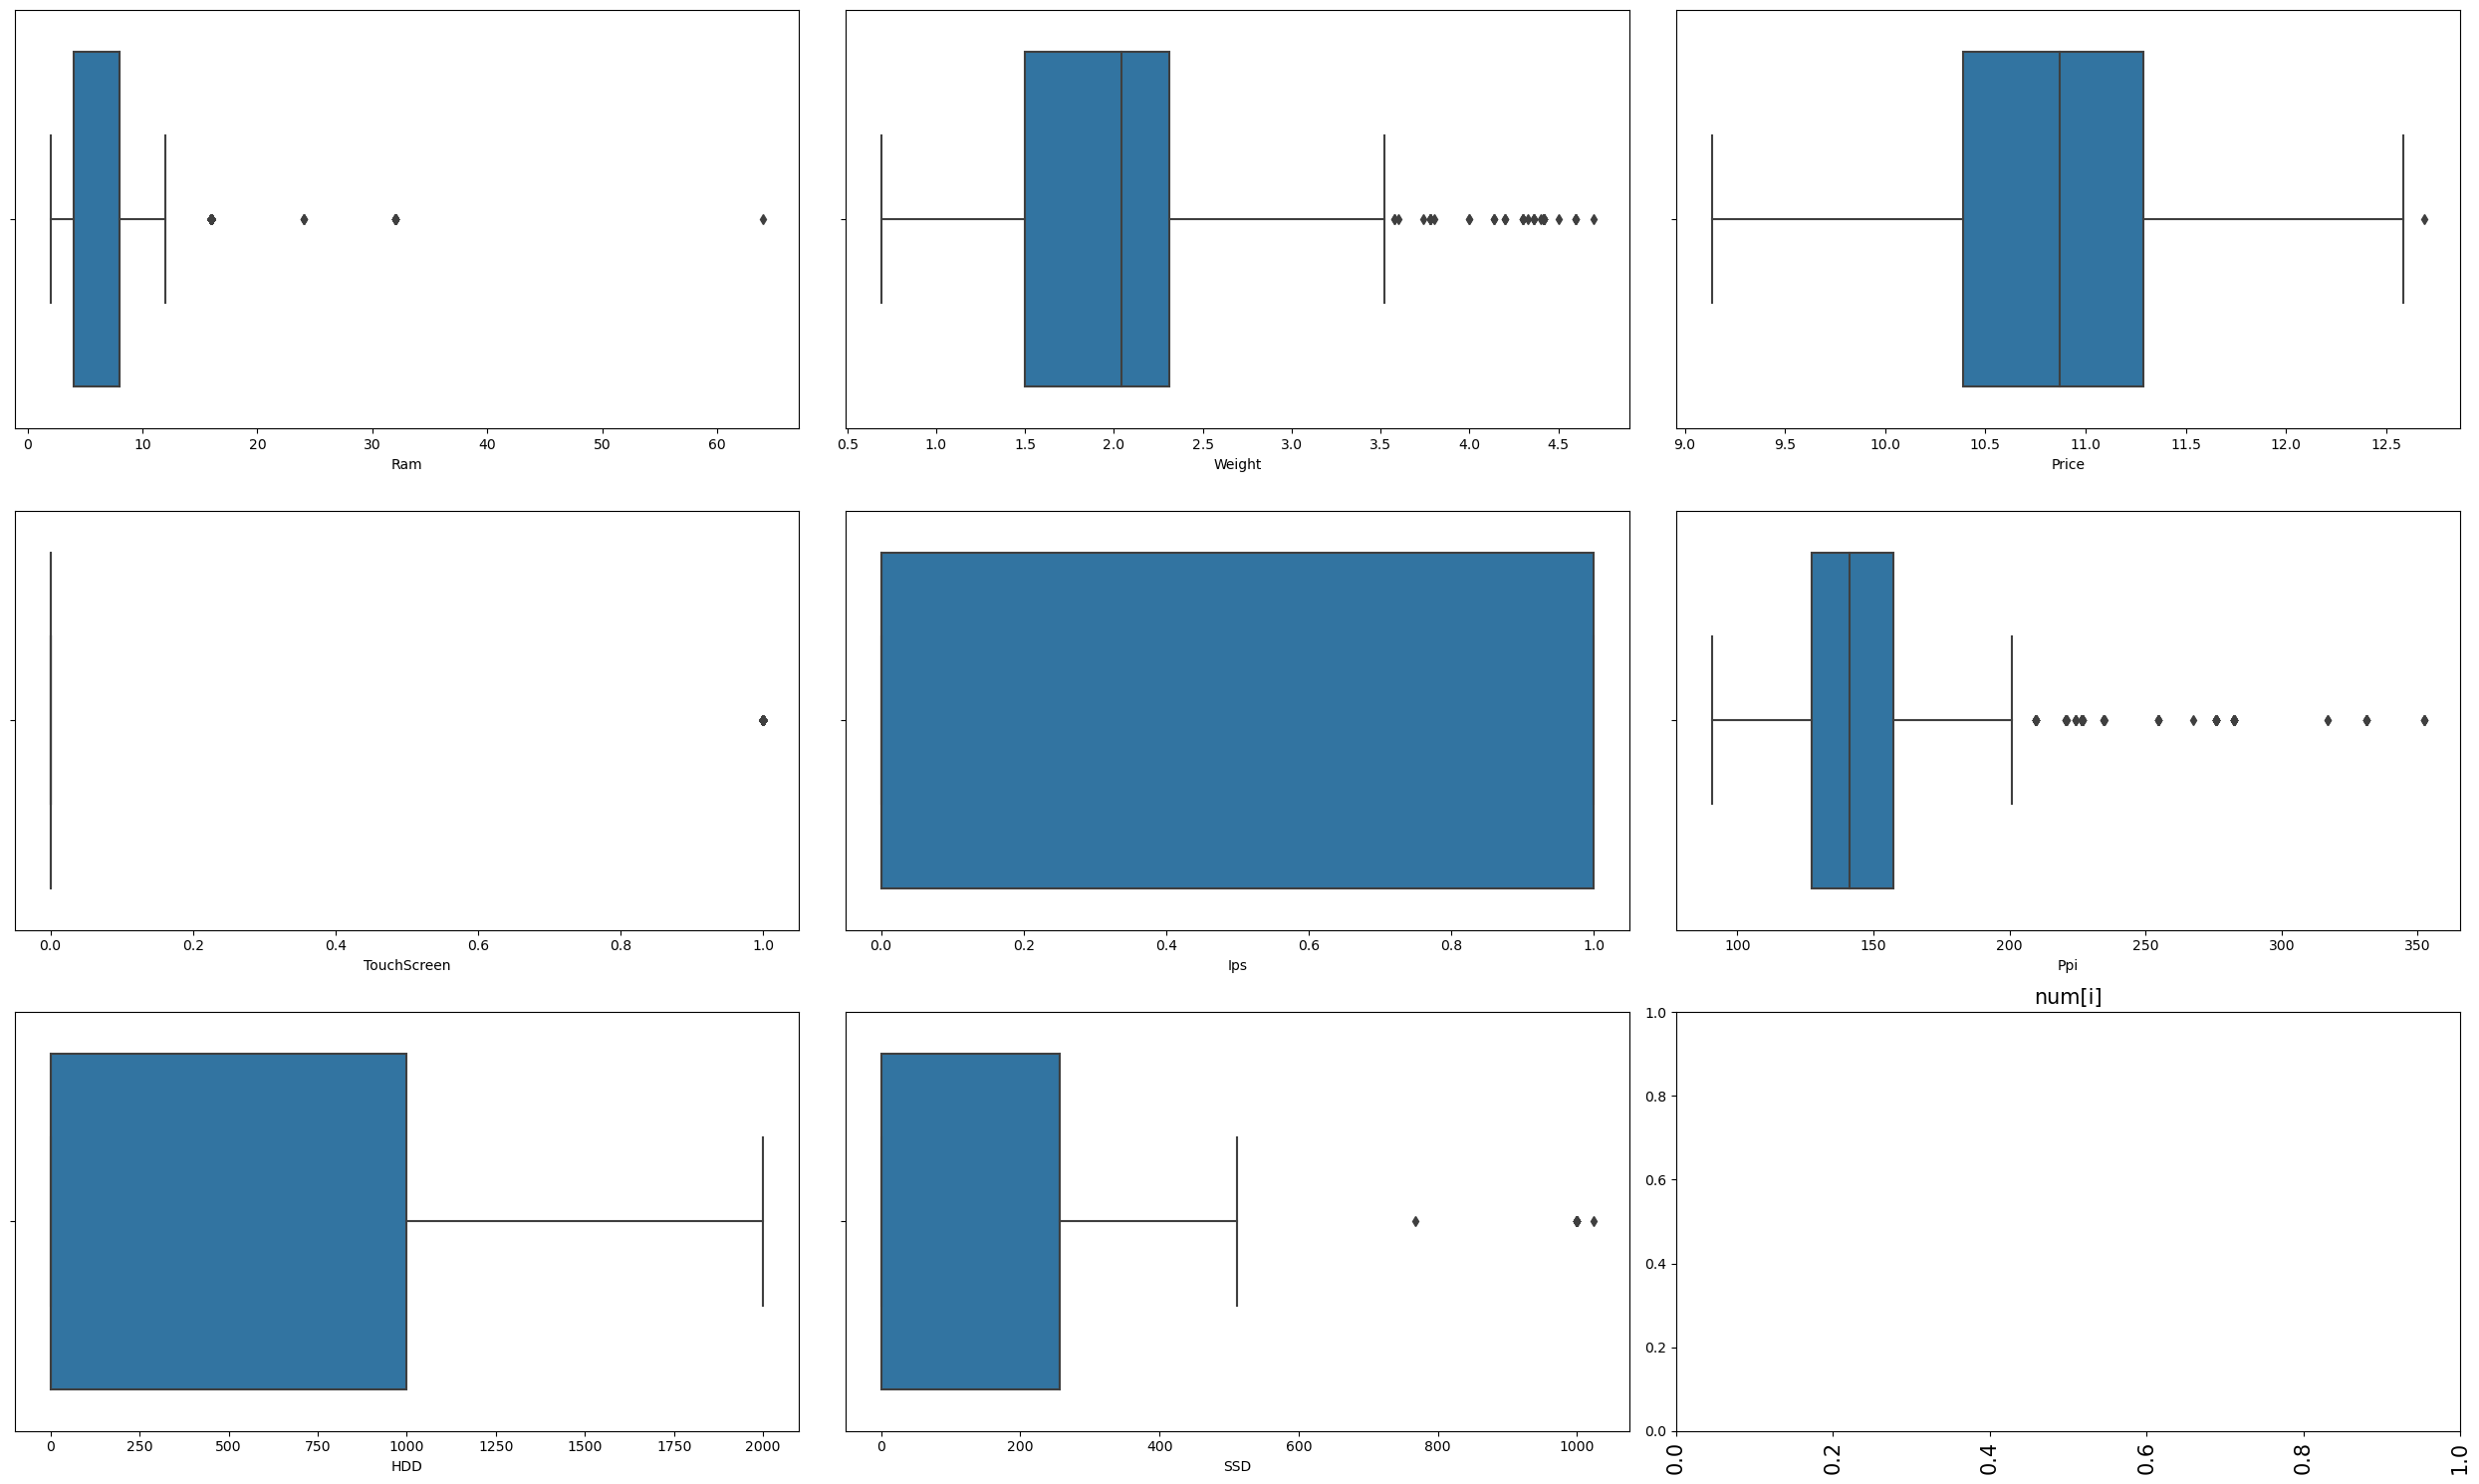

In [12]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(num[i], ax=subplot)
    plt.title('num[i]', fontsize=15)
    plt.xticks(rotation = 'vertical', fontsize = 15)

plt.tight_layout()
plt.show()

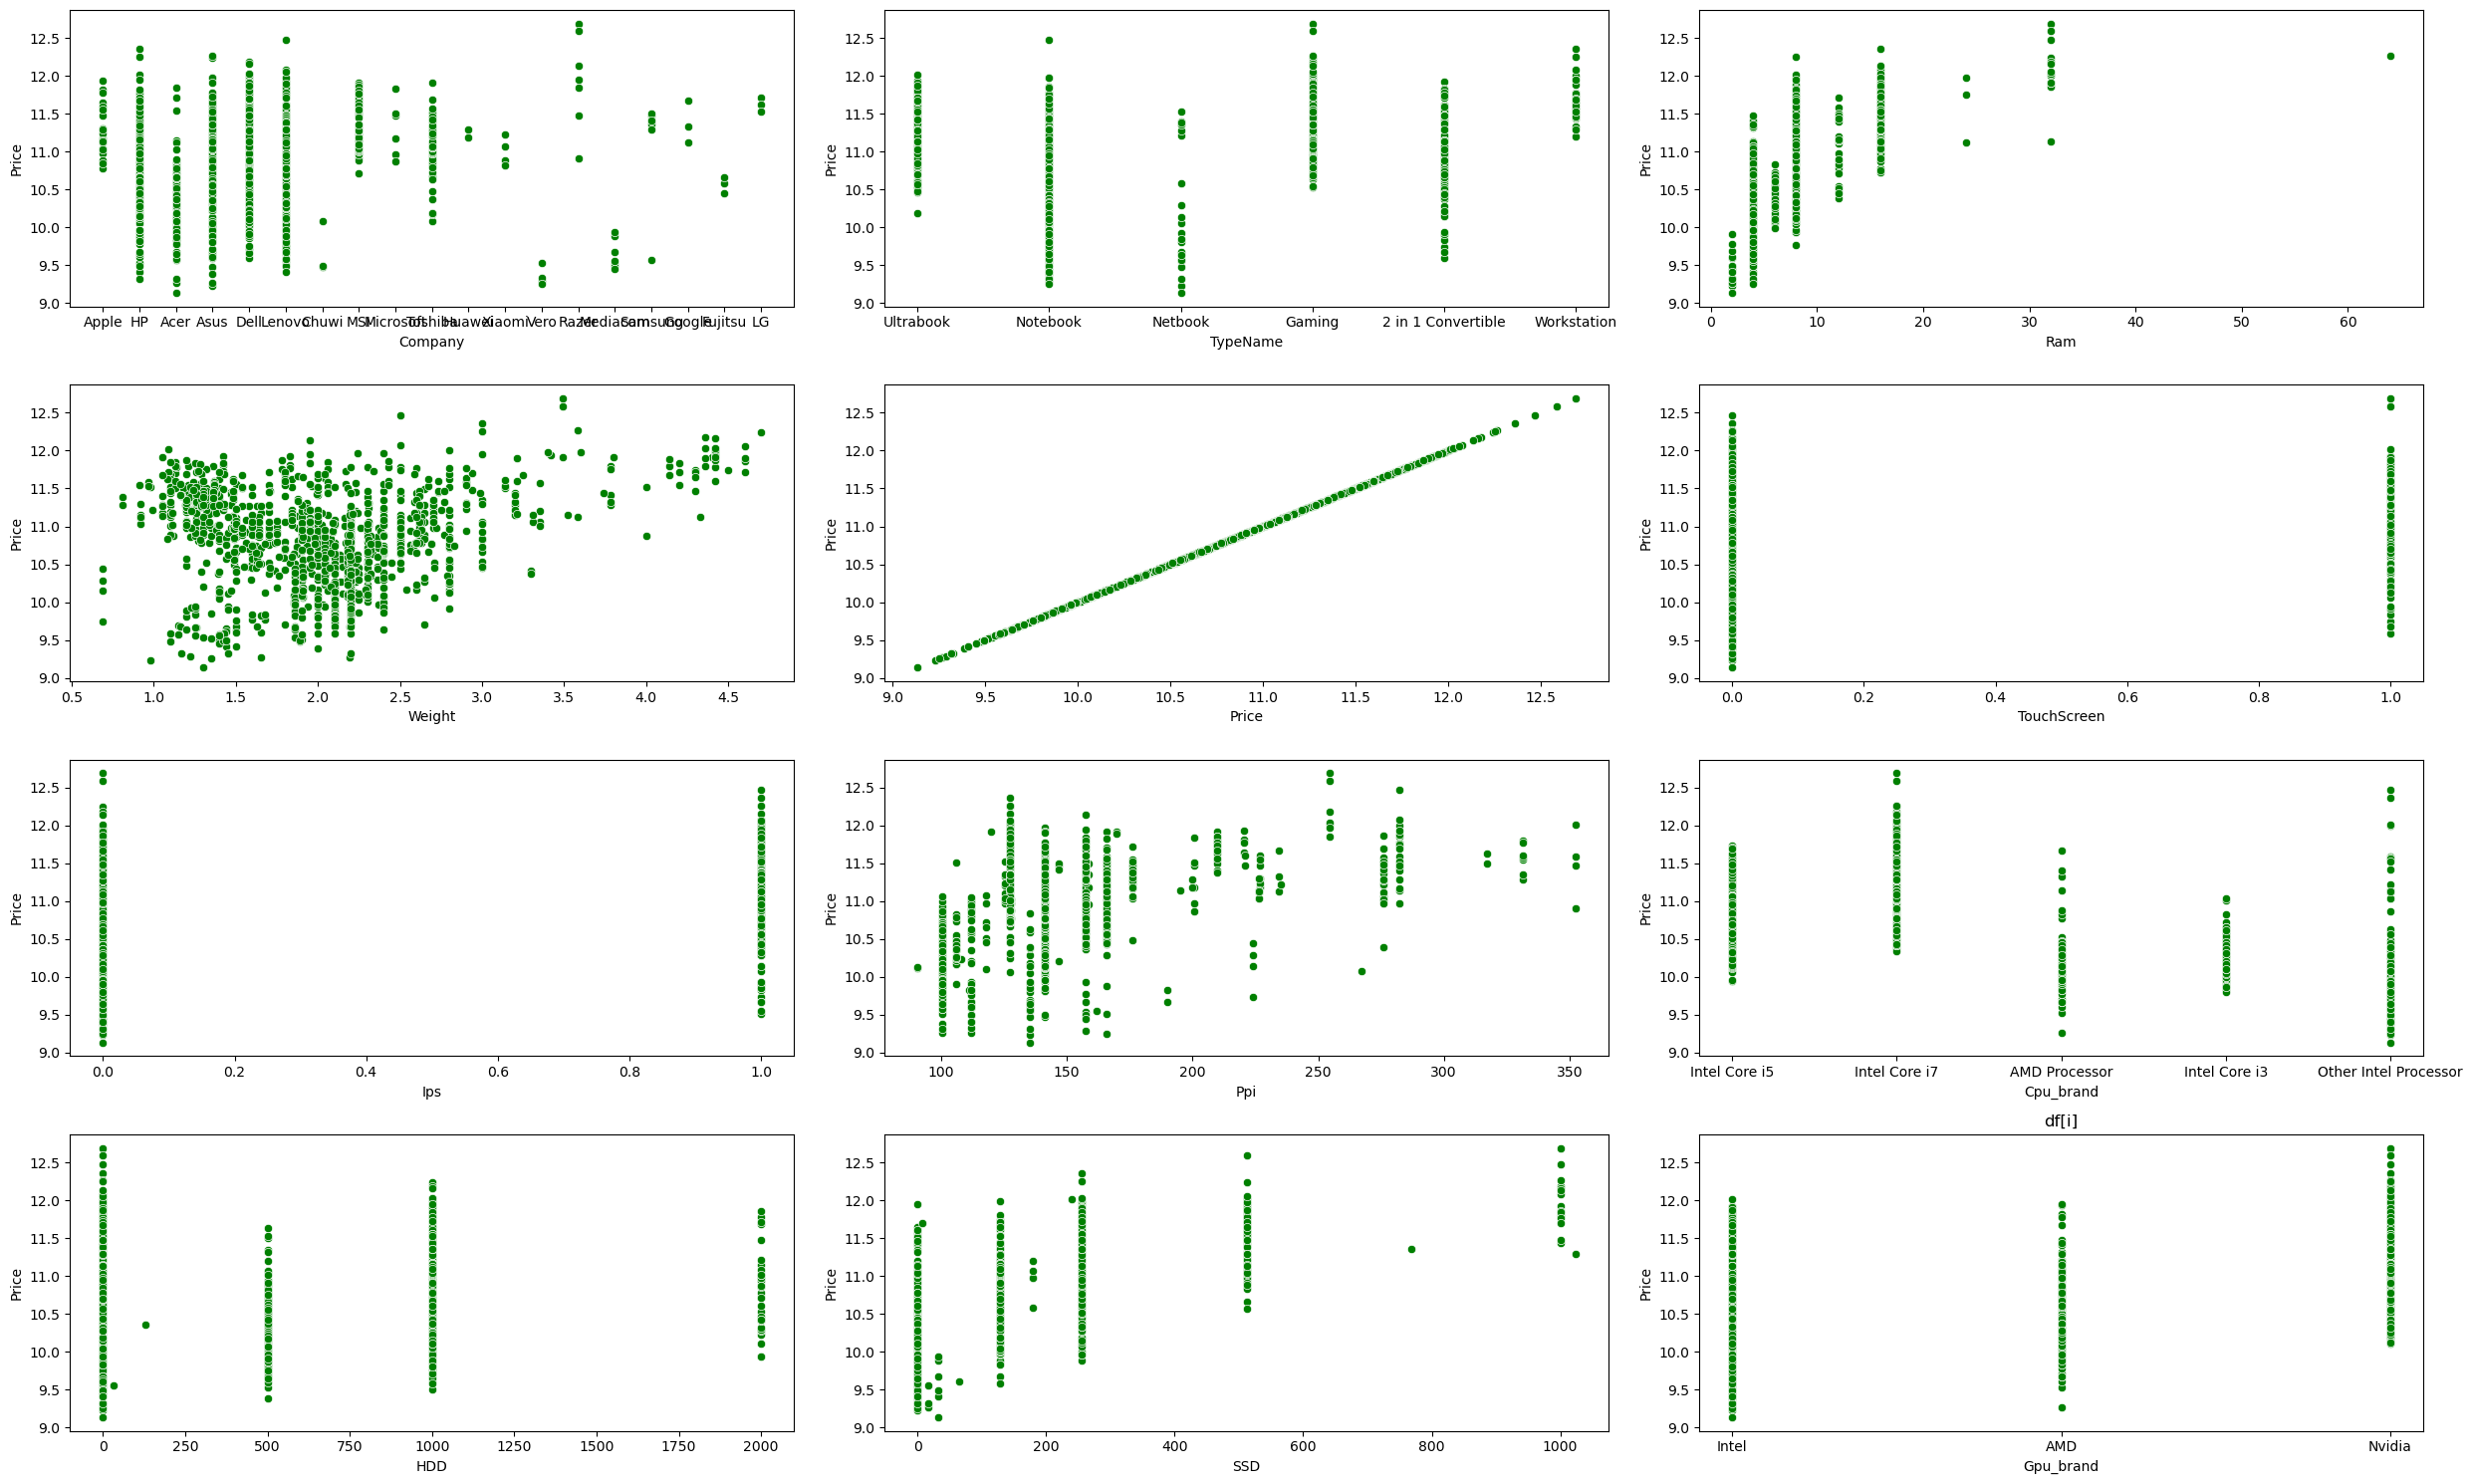

In [13]:
fig, ax= plt.subplots(4,3, figsize=(25,15))

for i, subplot in zip(df, ax.flatten()):
    sns.scatterplot(df[i],df['Price'], ax=subplot,color='green')
    plt.title('df[i]')

plt.tight_layout()
plt.show()

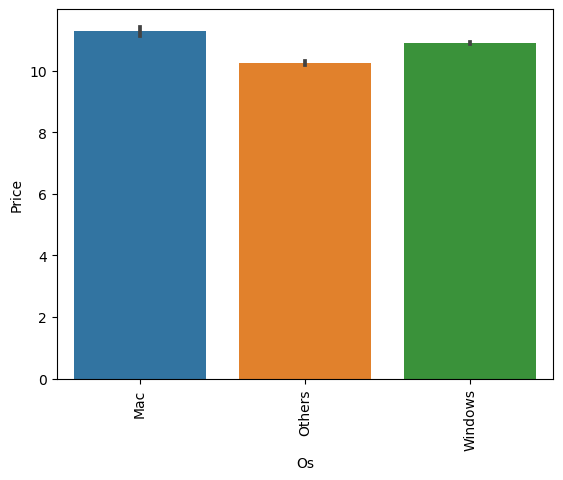

In [15]:
sns.barplot(x=df['Os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

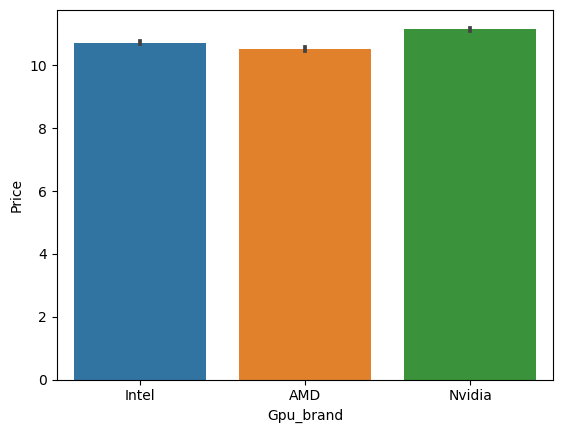

In [20]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator=np.mean)
plt.xticks(rotation='horizontal')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Density'>

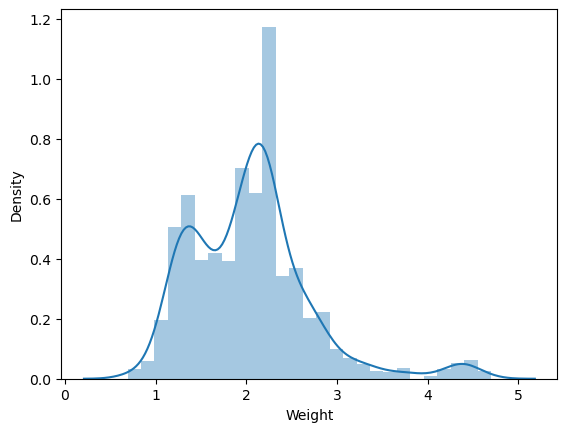

In [21]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

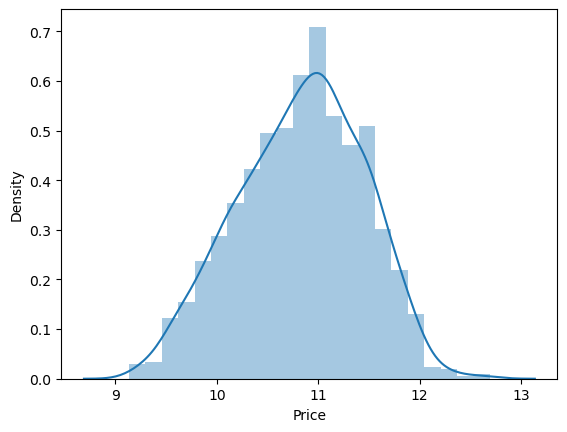

In [22]:
sns.distplot(df['Price'])

In [ ]:
#Target variable is normally distributed no need for a tranformation method

In [26]:
q1 =df.quantile(0.25)
q3= df.quantile(0.75)
iqr=q3-q1
upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr
df = df[~((df < (lower_limit)) | (df > (upper_limit))).any(axis=1)]
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
5,Acer,Notebook,4,2.10,9.967026,0,0,100.454670,AMD Processor,500,0,AMD,Windows
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
10,HP,Notebook,4,1.86,9.951658,0,0,100.454670,Intel Core i5,500,0,Intel,Others


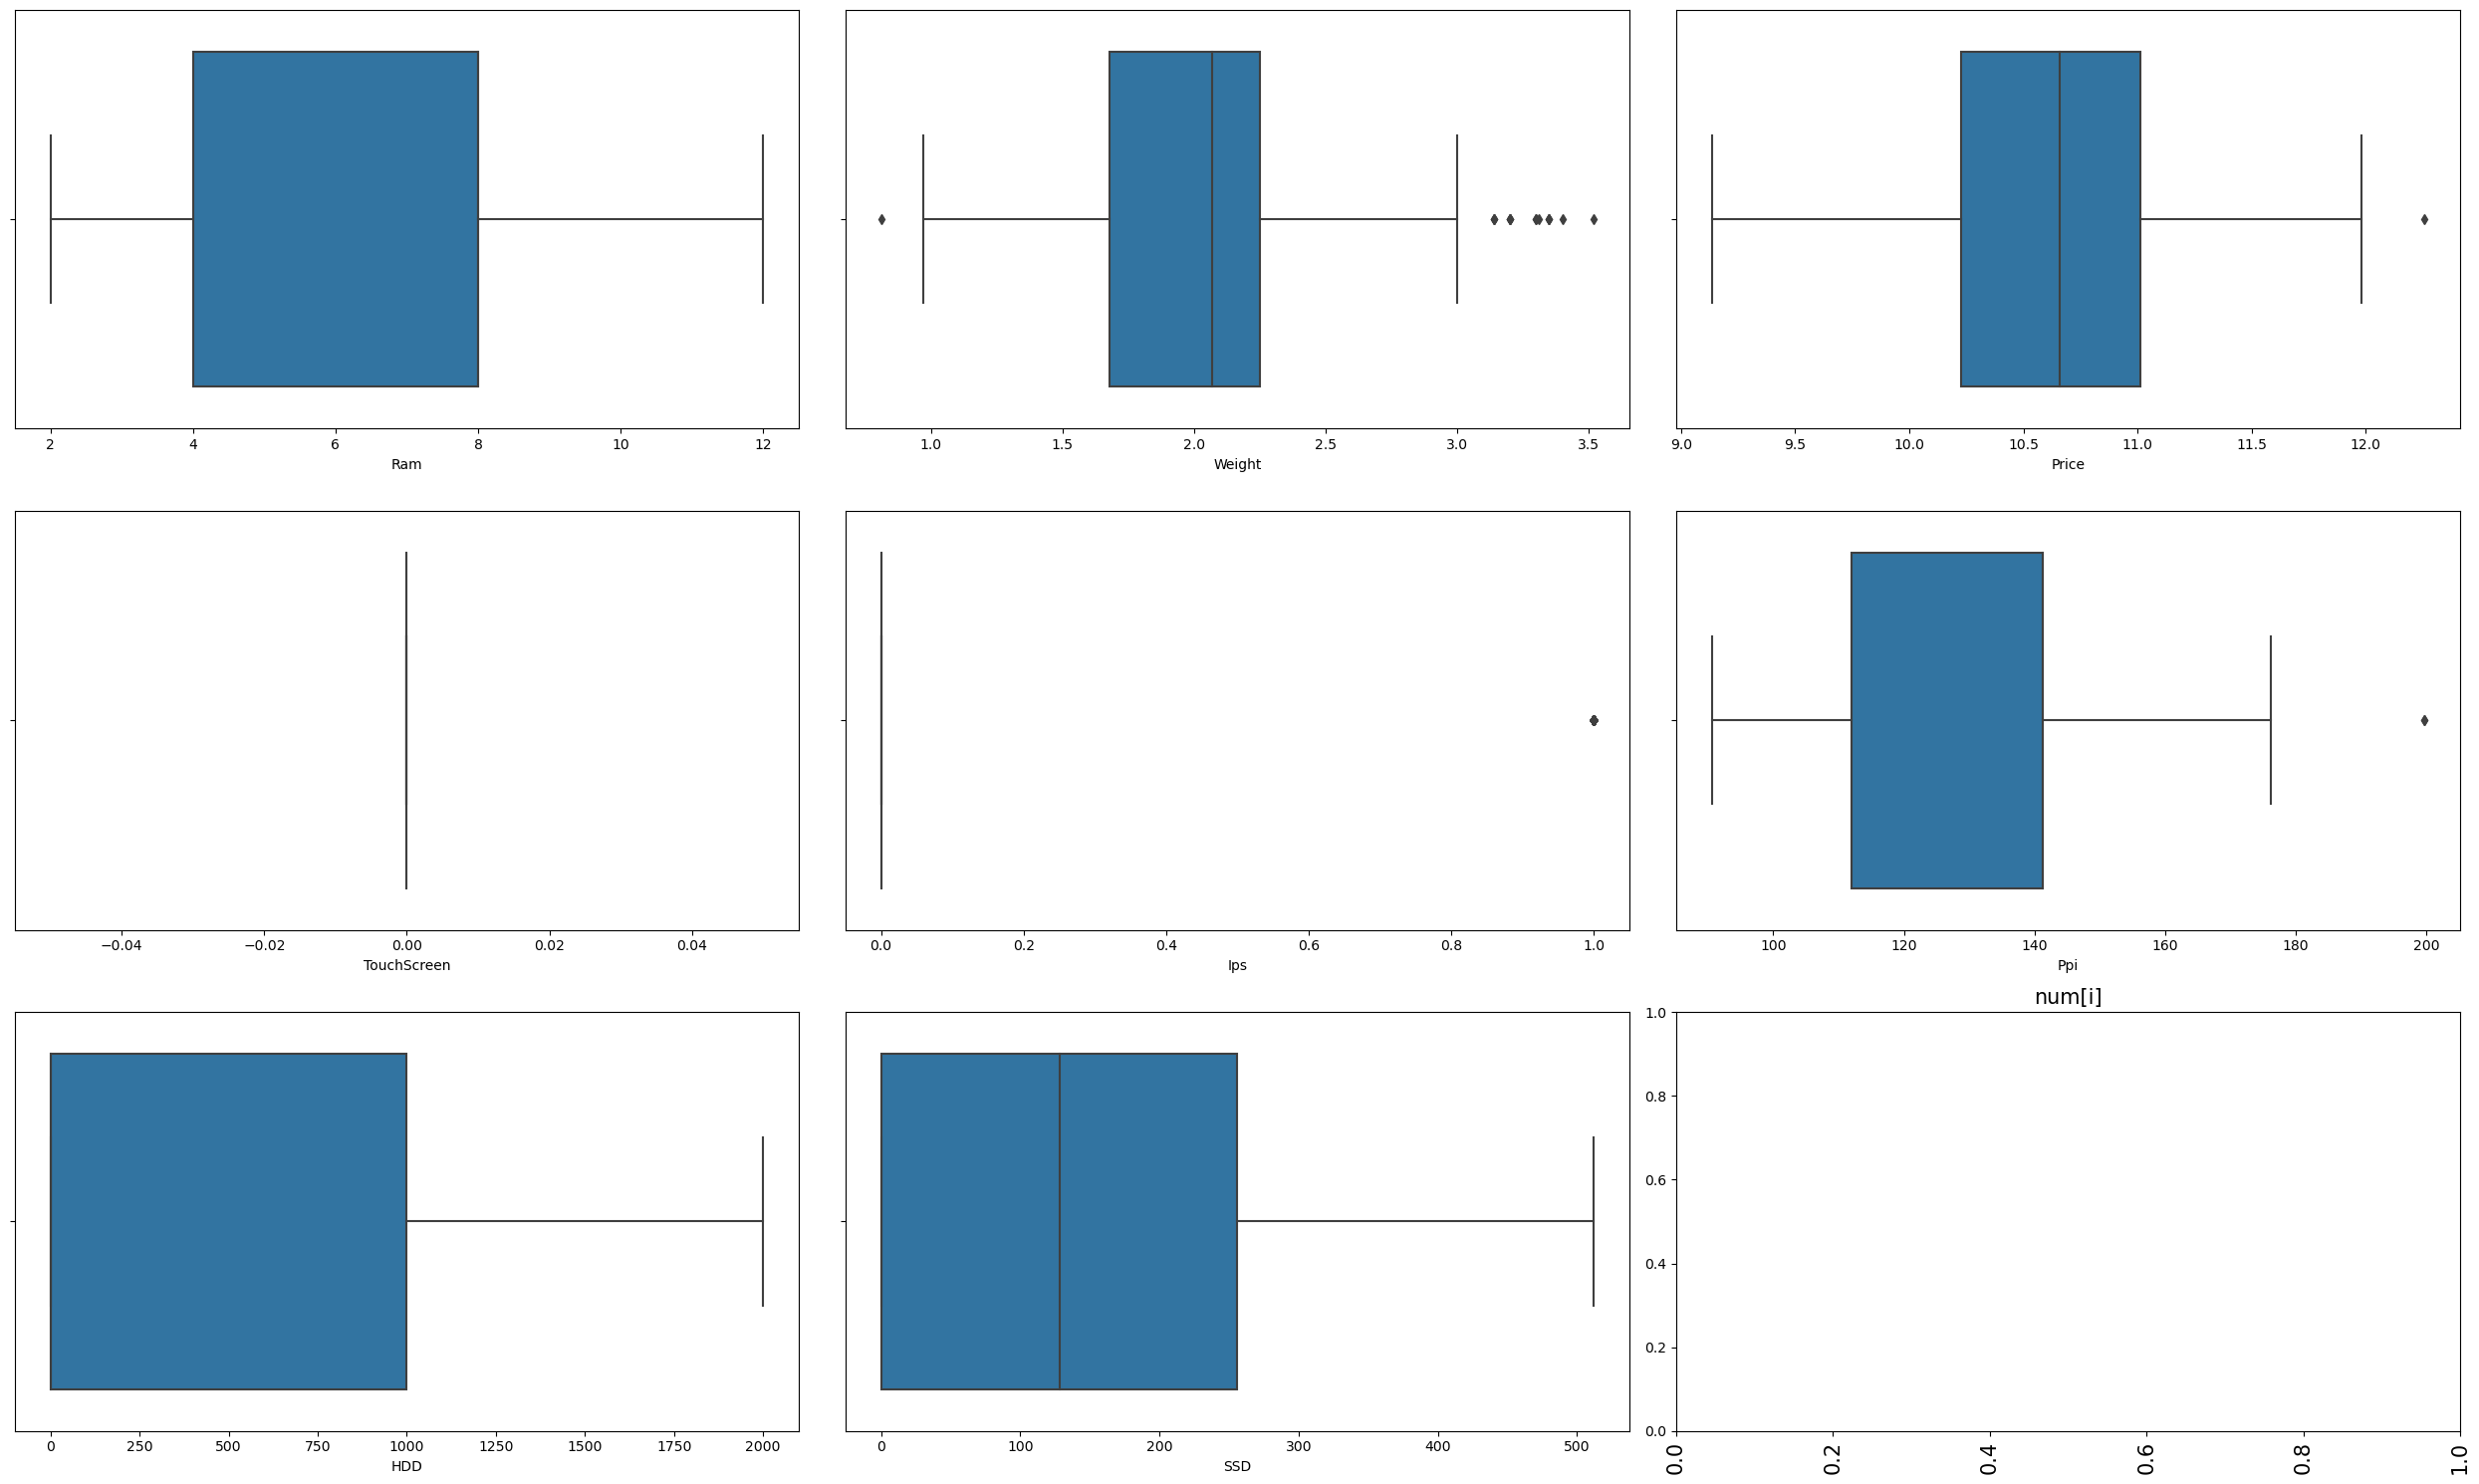

In [27]:
fig, ax= plt.subplots(3,3, figsize=(25,15))

for i, subplot in zip(num, ax.flatten()):
    sns.boxplot(num[i], ax=subplot)
    plt.title('num[i]', fontsize=15)
    plt.xticks(rotation = 'vertical', fontsize = 15)

plt.tight_layout()
plt.show()

In [ ]:
#Outliers are removed so now we can go further.

In [28]:
df.std()

Ram              2.128031
Weight           0.409723
Price            0.533375
TouchScreen      0.000000
Ips              0.000000
Ppi             22.071091
HDD            496.189662
SSD            129.319720
dtype: float64

In [ ]:
#IPS and Touch screen have 0std so we can remove those columns.

In [29]:
df = pd.get_dummies(df,drop_first=True)
df

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
1,8,1.34,10.776777,0,0,127.677940,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256,0,0,...,0,0,0,1,0,0,1,0,1,0
5,4,2.10,9.967026,0,0,100.454670,500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,1.34,11.030615,0,0,127.677940,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
10,4,1.86,9.951658,0,0,100.454670,500,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,8,2.30,10.667632,0,0,100.454670,1000,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1267,2,1.17,9.317895,0,0,135.094211,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1268,4,2.20,10.555257,0,0,100.454670,500,0,0,1,...,0,0,0,0,1,0,0,1,0,1
1271,2,1.50,9.409283,0,0,111.935204,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [32]:
import statsmodels.api as sma
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sfa

In [31]:
X = df.drop('Price',axis=1)
y = df['Price']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [33]:
x_train= sma.add_constant(x_train) 
x_test=sma.add_constant(x_test) 
model = sma.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     91.73
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          3.56e-168
Time:                        15:28:30   Log-Likelihood:                 79.505
No. Observations:                 486   AIC:                            -101.0
Df Residuals:                     457   BIC:                             20.39
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               7.9824      0.204     39.145      0.000       7.582       8.383
Ram                                 0.0384      0.007      5.388      0.000       0.024       0.052
Weight                             -0.0430      0.041     -1.052      0.293      -0.123       0.037
TouchScreen                     -7.845e-14   2.21e-15    -35.493      0.000   -8.28e-14   -7.41e-14
Ips                              5.335e-15   4.32e-16     12.357      0.000    4.49e-15    6.18e-15
Ppi                                 0.0022      0.001      3.377      0.001       0.001       0.004
HDD                              7.886e-05   3.09e-05      2.552      0.011    1.81e-05       0.000
SSD                                 0.0008      0.000      5.900      0.000       0.001       0.001
Company_Apple                       2.8403      0.122     23.279      0.000       2.600       3.080
Company_Asus                        0.0225      0.045      0.505      0.614      -0.065       0.110
Company_Chuwi                      -0.3393      0.218     -1.556      0.120      -0.768       0.089
Company_Dell                        0.1439      0.043      3.382      0.001       0.060       0.228
Company_Fujitsu                    -0.0106      0.156     -0.068      0.946      -0.318       0.297
Company_HP                          0.1257      0.041      3.100      0.002       0.046       0.205
Company_Lenovo                      0.0264      0.041      0.649      0.517      -0.053       0.106
Company_MSI                         0.1326      0.082      1.620      0.106      -0.028       0.294
Company_Mediacom                   -0.3754      0.160     -2.346      0.019      -0.690      -0.061
Company_Samsung                  1.131e-14   1.13e-15     10.015      0.000    9.09e-15    1.35e-14
Company_Toshiba                     0.2572      0.064      4.039      0.000       0.132       0.382
Company_Vero                       -0.5331      0.134     -3.990      0.000      -0.796      -0.270
TypeName_Gaming                    -1.0257      0.228     -4.505      0.000      -1.473      -0.578
TypeName_Netbook                   -1.0799      0.225     -4.791      0.000      -1.523      -0.637
TypeName_Notebook                  -1.1493      0.222     -5.168      0.000      -1.586      -0.712
TypeName_Ultrabook                 -0.9986      0.224     -4.448      0.000      -1.440      -0.557
TypeName_Workstation               -0.6603      0.242     -2.726      0.007      -1.136      -0.184
Cpu_brand_Intel Core i3             0.0863      0.056      1.547      0.123      -0.023       0.196
Cpu_brand_Intel Core i5             0.3614      0.053      6.761      0.000       0.256       0.466
Cpu_brand_Intel Core i7             0.4799      0.057      8.490      0.000       0

In [34]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [35]:
y_pred_ols_T = model.predict(x_train)
y_pred_ols = model.predict(x_test)

In [36]:
print('R square: ',r2_score(y_test,y_pred_ols))
print('R square_Train: ',r2_score(y_train,y_pred_ols_T))
print('MSE: ',mean_squared_error(y_test,y_pred_ols))
print('RMSE_Train: ',mean_squared_error(y_train,y_pred_ols_T)**0.5)
print('RMSE_Test: ',mean_squared_error(y_test,y_pred_ols)**0.5)
print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred_ols))

R square:  0.7866160266622948
R square_Train:  0.8489482972811806
MSE:  0.0628852074953128
RMSE_Train:  0.20545502877081007
RMSE_Test:  0.25076923155625136
MAPE:  0.018399326466689805


In [37]:
#Select important features using sfs
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
sfs_forward = SequentialFeatureSelector(estimator = lr, k_features='best',
                                forward = True, 
                                #verbose=2,
                                scoring = "r2") 

In [39]:
sfs_forward.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 33),
                          scoring='r2')

In [40]:
sfs_forward.k_feature_names_

('Ram',
 'Weight',
 'TouchScreen',
 'Ips',
 'Ppi',
 'HDD',
 'SSD',
 'Company_Chuwi',
 'Company_Dell',
 'Company_HP',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Toshiba',
 'Company_Vero',
 'TypeName_Notebook',
 'TypeName_Workstation',
 'Cpu_brand_Intel Core i3',
 'Cpu_brand_Intel Core i5',
 'Cpu_brand_Intel Core i7',
 'Cpu_brand_Other Intel Processor',
 'Gpu_brand_Intel',
 'Gpu_brand_Nvidia',
 'Os_Others')

In [41]:
sel_feature = list(sfs_forward.k_feature_names_)

In [42]:
model_sfs = LinearRegression()
model_sfs.fit(x_train[sel_feature],y_train)

LinearRegression()

In [43]:
y_pred_train =model_sfs.predict(x_train[sel_feature])
y_pred_sfs = model_sfs.predict(x_test[sel_feature])
print('R square: ',r2_score(y_test,y_pred_sfs))
print('MSE: ',mean_squared_error(y_test,y_pred_sfs))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_sfs)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_train)**0.5)

print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred_sfs))

R square:  0.783967579106263
MSE:  0.0636657167880043
RMSE_test:  0.25232066262596153
RMSE_train:  0.21103068119875634
MAPE:  0.01862173963240797


In [ ]:
#Decision tree Rgressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
model_DT = DecisionTreeRegressor()
model_DT.fit(x_train, y_train)
y_pred_DT_Train = model_DT.predict(x_train)
y_pred_DT_Test = model_DT.predict(x_test)
print('R square: ',r2_score(y_test,y_pred_DT_Test))
print('MSE: ',mean_squared_error(y_test,y_pred_DT_Test))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_DT_Test)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_DT_Train)**0.5)


R square:  0.7959745720131869
MSE:  0.06012720249128303
RMSE_test:  0.24520848780432344
RMSE_train:  0.040561455309862667


In [54]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [62]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train[sel_feature], y_train)
y_pred_rf_Train = model_rf.predict(x_train[sel_feature])
y_pred_rf_Test = model_rf.predict(x_test[sel_feature])
print('R square: ',r2_score(y_test,y_pred_rf_Test))
print('MSE: ',mean_squared_error(y_test,y_pred_rf_Test))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_rf_Test)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_rf_Train)**0.5)

R square:  0.8615537338772008
MSE:  0.04080073135719946
RMSE_test:  0.2019919091379639
RMSE_train:  0.08543618152104603


In [65]:
model_ad = AdaBoostRegressor()
model_ad.fit(x_train[sel_feature], y_train)
y_pred_ad_Train = model_ad.predict(x_train[sel_feature])
y_pred_ad_Test = model_ad.predict(x_test[sel_feature])
print('R square: ',r2_score(y_test,y_pred_ad_Test))
print('MSE: ',mean_squared_error(y_test,y_pred_ad_Test))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_ad_Test)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_ad_Train)**0.5)

R square:  0.7709188159490634
MSE:  0.0675112454182123
RMSE_test:  0.2598292620514716
RMSE_train:  0.21870380241586548


model's performance is reasonably good, the slightly lower performance on the testing data compared to the training data indicates a potential for overfitting. It would be advisable to further evaluate the model and potentially consider regularization techniques or other measures to address this potential issue.

In [66]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train[sel_feature], y_train)
y_pred_gb_Train = model_gb.predict(x_train[sel_feature])
y_pred_gb_Test = model_gb.predict(x_test[sel_feature])
print('R square: ',r2_score(y_test,y_pred_gb_Test))
print('MSE: ',mean_squared_error(y_test,y_pred_gb_Test))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_gb_Test)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_gb_Train)**0.5)

R square:  0.8462109855595066
MSE:  0.045322307633125294
RMSE_test:  0.21289036528956704
RMSE_train:  0.15200701722411203


Based on these metrics, it appears that the model is not overfitting. The performance on both the training and testing data is relatively good, with similar RMSE values. The R-squared value also indicates a reasonable level of explained variance.

In [68]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd_model=sgd.fit(x_train ,y_train)
model_sgd = SGDRegressor()
model_sgd.fit(x_train[sel_feature], y_train)
y_pred_sgd_Train = model_sgd.predict(x_train[sel_feature])
y_pred_sgd_Test = model_sgd.predict(x_test[sel_feature])
print('R square: ',r2_score(y_test,y_pred_sgd_Test))
print('MSE: ',mean_squared_error(y_test,y_pred_sgd_Test))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_sgd_Test)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_sgd_Train)**0.5)

R square:  -4.6860268435291566e+27
MSE:  1.3809929854364842e+27
RMSE_test:  37161713973342.03
RMSE_train:  37459486669755.05


In [ ]:
#Given the high values for both RMSE_test (37,161,713,973,342.03) and 
#RMSE_train (37,459,486,669,755.05), it appears that the model is overfitting. 
#The model's performance is poor on both the training and testing data, suggesting that it fails to 
#generalize well beyond the training data. The R-squared value being negative 
#(-4.6860268435291566e+27) further confirms the poor fit of the model.

In [70]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}

gscv = GridSearchCV(estimator=Ridge(),
                   param_grid=grid,cv=3,scoring='r2')

gscv.fit(x_train[sel_feature],y_train)
gscv.best_params_

{'alpha': 0.1}

In [72]:
model_ridge = Ridge(**gscv.best_params_)
model_ridge.fit(x_train,y_train)
y_pred_ridge = model_ridge.predict(x_test)
y_pred_ridge_train=model_ridge.predict(x_train)
print('R square: ',r2_score(y_test,y_pred_ridge))  # Test score
print('MSE: ',mean_squared_error(y_test,y_pred_ridge))
print('RMSE_test: ',mean_squared_error(y_test,y_pred_ridge)**0.5)
print('RMSE_train: ',mean_squared_error(y_train,y_pred_ridge_train)**0.5)
print('MAPE: ',mean_absolute_percentage_error(y_test,y_pred_ridge))

R square:  0.7872473327111698
MSE:  0.0626991587904566
RMSE_test:  0.25039800077168467
RMSE_train:  0.2060188489691963
MAPE:  0.01840233547650562
